In [1]:
import pickle

# Genetico

In [2]:
selection_modes = ["ruleta", "top"]
join_modes = ["cross", "none", "cross-old"]
replace_modes = ["generational", "state", "doom-day"]
num_total_agents = [20,50,100,200,500,1000]
results = {}

In [3]:
for agents in num_total_agents:
    with open(f'results/results_ga_agentsperpop{agents}.pickle', 'rb') as handle:
        b = pickle.load(handle)
    results[agents] = b

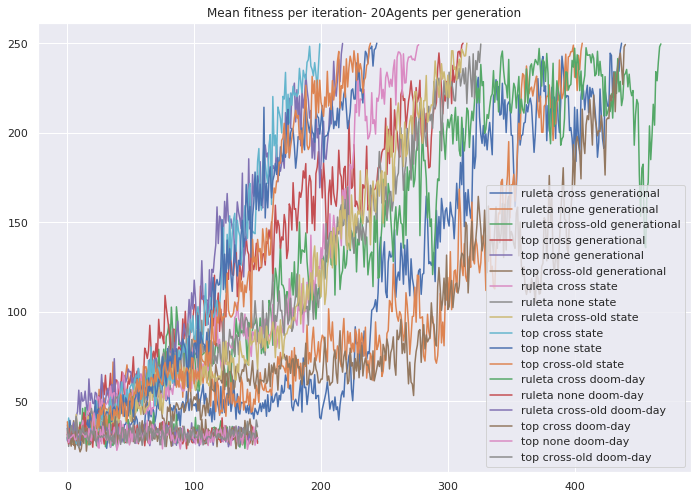

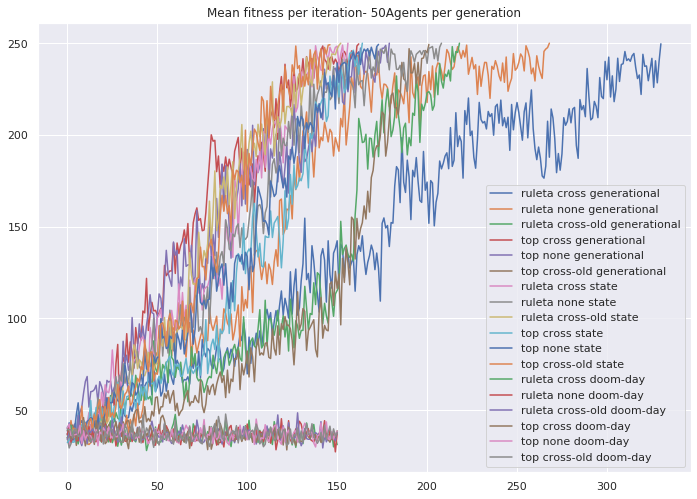

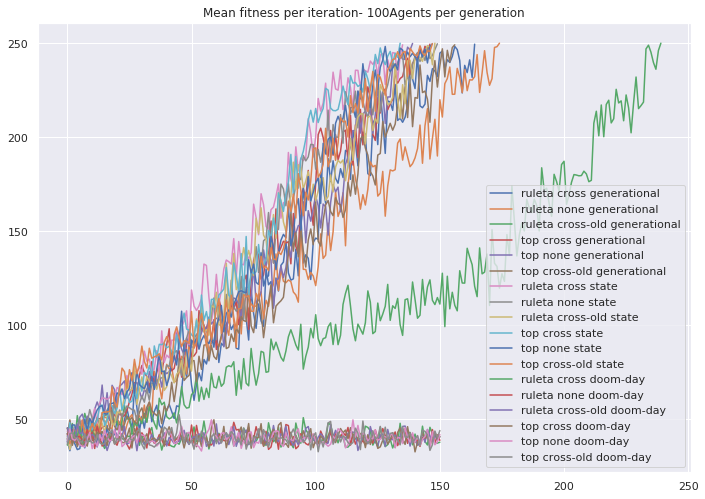

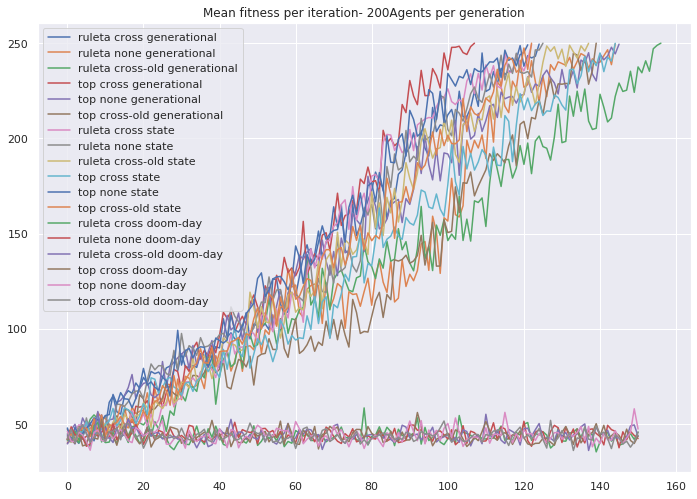

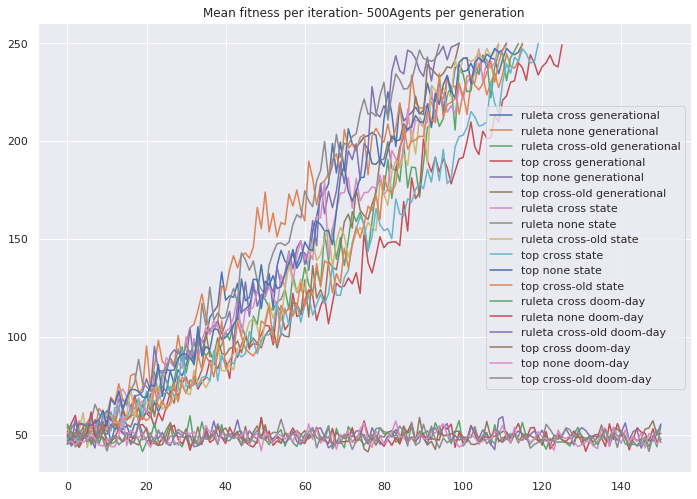

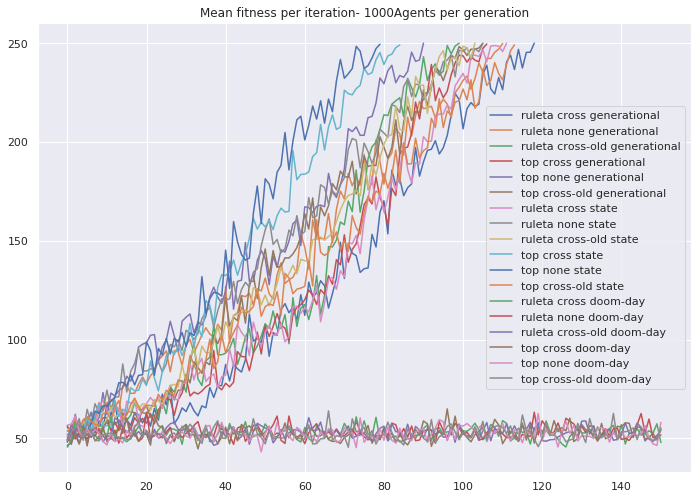

In [4]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
for agents in num_total_agents:
    for replace_mode in replace_modes:
        for select_mode in selection_modes:
            for join_mode in join_modes:
                data = results[agents][(select_mode,join_mode,replace_mode)]
                sns.lineplot(list(range(len(data))),data,label=select_mode + " " + join_mode + " " + replace_mode).set_title(f"Mean fitness per iteration- {agents}Agents per generation")#l
    plt.savefig(f'results/{agents}.png')    
    plt.show()


In [5]:
len_results = {}
for agents in num_total_agents:
    len_results[agents] = {}
    for replace_mode in replace_modes:
        for select_mode in selection_modes:
            for join_mode in join_modes:
                len_results[agents][(select_mode,join_mode,replace_mode)] = len(results[agents][(select_mode,join_mode,replace_mode)])
                
for agents in num_total_agents:
    for replace_mode in ["doom-day"]:
        for select_mode in selection_modes:
            for join_mode in join_modes:
                len_results[agents][(select_mode,join_mode,replace_mode)] = None

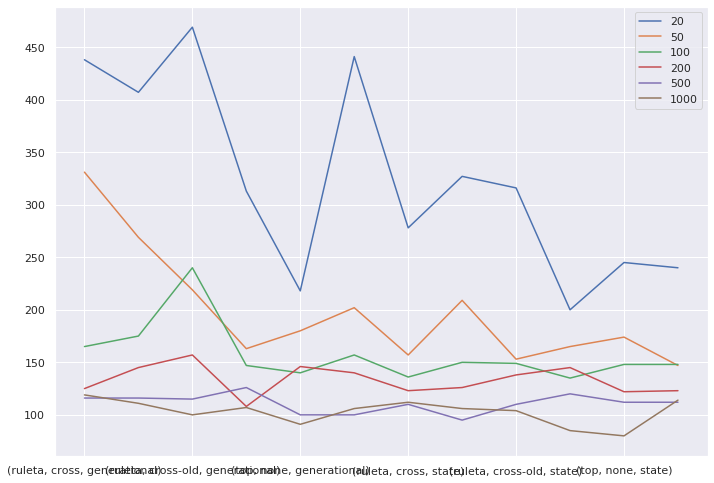

In [6]:
df = pd.DataFrame.from_dict(len_results)
df.plot()

In [7]:
df.to_latex("latex/ga.tex",index=True)

In [8]:
df.mean().to_latex("latex/ga-meanN.tex")

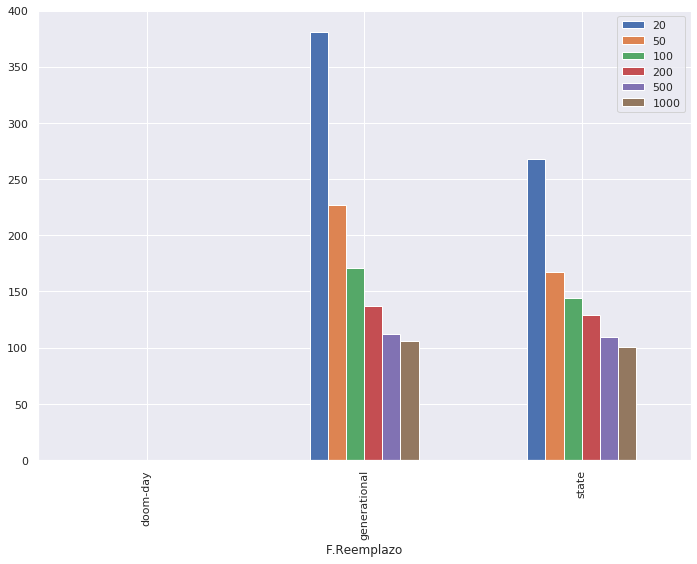

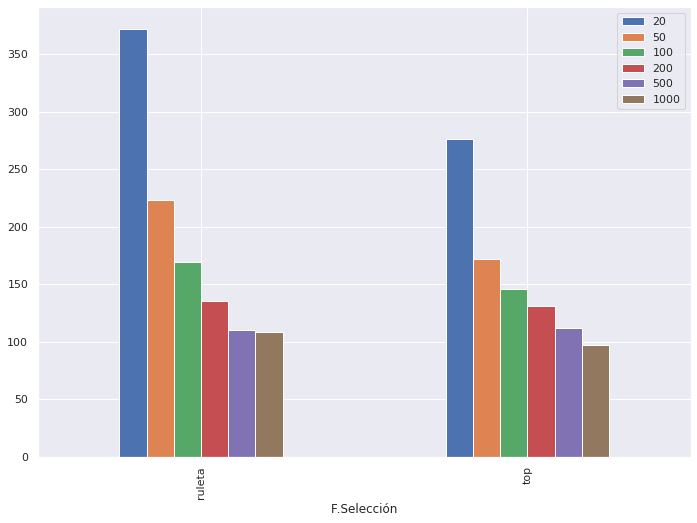

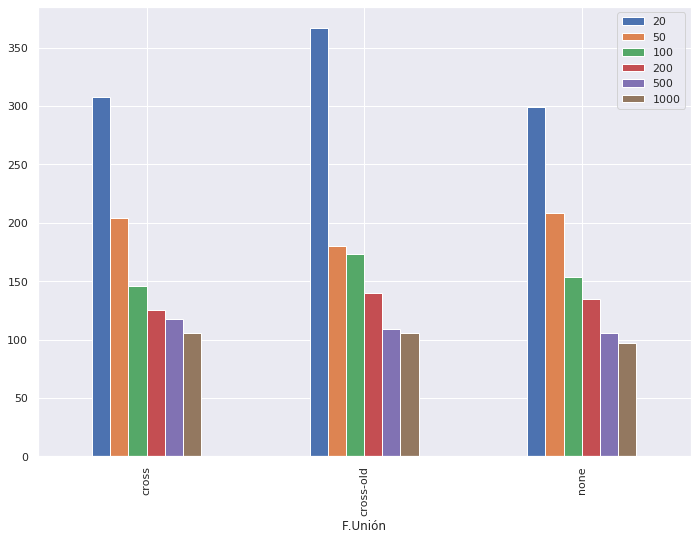

In [9]:
df = df.reset_index().rename(columns={'level_0':'F.Selección',
                          'level_1':'F.Unión',
                          'level_2':'F.Reemplazo'})

df.groupby(["F.Reemplazo"]).mean()[[20,50,100,200,500,1000]].to_latex("latex/ga-reemplazo.tex")
df.groupby(["F.Selección"]).mean()[[20,50,100,200,500,1000]].to_latex("latex/ga-seleccion.tex")
df.groupby(["F.Unión"]).mean()[[20,50,100,200,500,1000]].to_latex("latex/ga-union.tex")


# df.groupby(["F.Reemplazo"]).mean()[[20,50,100,200,500,1000]].plot.bar()
# df.groupby(["F.Selección"]).mean()[[20,50,100,200,500,1000]].plot.bar()
# df.groupby(["F.Unión"]).mean()[[20,50,100,200,500,1000]].plot.bar()


### Simulado

In [10]:
import pandas as pd

In [11]:
unpickled_df = pd.read_pickle("results/exportEvaluacionEnfriamiento.pkl")

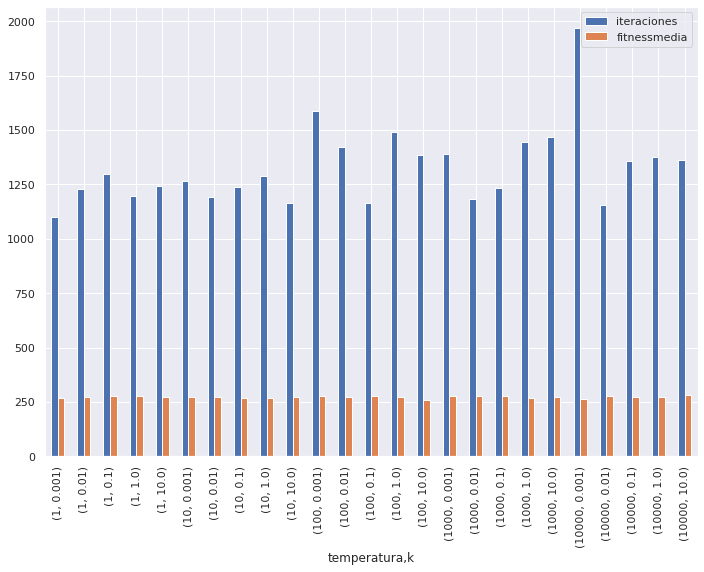

In [12]:
unpickled_df.groupby(["temperatura","k"]).mean().plot.bar()
    

In [13]:
unpickled_df.groupby(["temperatura"]).mean()[["iteraciones","fitnessmedia"]].to_latex("latex/es-temperatura.tex")

In [14]:
unpickled_df.groupby(["k"]).mean()[["iteraciones","fitnessmedia"]].to_latex("latex/es-k.tex")

In [15]:
unpickled_df.to_latex("latex/table.tex",index=False)

In [16]:
unpickled_df

,temperatura,k,iteraciones,fitnessmedia
0,1,0.001,1100.100000,268.600000
1,1,0.010,1230.066667,273.355556
2,1,0.100,1299.366667,275.600000
3,1,1.000,1195.066667,275.133333
4,1,10.000,1242.166667,274.822222
5,10,0.001,1267.100000,273.033333
6,10,0.010,1194.266667,270.688889
7,10,0.100,1236.700000,268.766667
8,10,1.000,1290.166667,269.533333
9,10,10.000,1163.566667,273.744444
